# Trabalho Final da disciplina de Deep Learning
## Professor: Luan Porfirio e Silva
## Aluno: Recígio Poffo

In [ ]:
# Import das libs necessárias

In [5]:
from torchtext.datasets import IMDB
from collections import Counter
from string import punctuation

import os,glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

### Carregando os dados

#### Em um primeiro momento tentei utiliza os dados da lib do IBDM, do torchtext.datasets, mas, por algum motivo, os dados todos eram trazidos com o label de 'positivo'. 

#### Por isso, optei por baixar os arquivos e carregar os .txt 'a mão'.

In [2]:
#train_iter, test_iter = IMDB(split=('train', 'test'))
#reviews = []
#labels = []
#for (label, line) in test_iter:
#    reviews.append(line)
#    labels.append(label)

In [6]:
#next(train_iter)
reviews = []
labels = []

In [7]:
train_pos_folder_path = '.data/IMDB/aclImdb/train/pos'
train_neg_folder_path = '.data/IMDB/aclImdb/train/neg'

test_pos_folder_path = '.data/IMDB/aclImdb/train/pos'
test_neg_folder_path = '.data/IMDB/aclImdb/train/neg'

In [8]:
for filename in glob.glob(os.path.join(train_pos_folder_path, '*.txt')):
    with open(filename, 'r', encoding="utf8") as f:
        text = f.read()
        reviews.append(text)
        labels.append('pos')

for filename in glob.glob(os.path.join(train_neg_folder_path, '*.txt')):
    with open(filename, 'r', encoding="utf8") as f:
        text = f.read()
        reviews.append(text)
        labels.append('neg')
        
for filename in glob.glob(os.path.join(test_pos_folder_path, '*.txt')):
    with open(filename, 'r', encoding="utf8") as f:
        text = f.read()
        reviews.append(text)
        labels.append('pos')

for filename in glob.glob(os.path.join(test_neg_folder_path, '*.txt')):
    with open(filename, 'r', encoding="utf8") as f:
        text = f.read()
        reviews.append(text)
        labels.append('neg')

### Conferência dos dados

In [10]:
len(reviews),len(labels)

(50000, 50000)

In [11]:
p = pd.DataFrame(reviews,labels)
p

,0
pos,Bromwell High is a cartoon comedy. It ran at t...
pos,Homelessness (or Houselessness as George Carli...
pos,Brilliant over-acting by Lesley Ann Warren. Be...
pos,This is easily the most underrated film inn th...
pos,This is not the typical Mel Brooks film. It wa...
...,...
neg,"Towards the end of the movie, I felt it was to..."
neg,This is the kind of movie that my enemies cont...
neg,I saw 'Descent' last night at the Stockholm Fi...
neg,Some films that you pick up for a pound turn o...


In [12]:
print(reviews[22100])
print(labels[22100])

Okay like most Steven Seagal fans I know I not going expect a masterpiece every time he makes a film but I do expect the film to at least have some sorter budget. The main problem with the copy I watched was the terrible over dubbing I know that in some films this has to be done and I accept that but when they overdub with a totally different actors voice and keep doing this thru out the film it does take the magic of overdubbing away. Also the sets seem to be built with no care as in one scene the sliding glass top in a top secret lab has a massive crack going thru it. I was truly disappointed with this film and only hope Stevens next project will be more finished off before sending the film out for buying/renting. The story of this film had me wondering if I was watching a sci-fi film or not some parts seemed alien like but they never fully explained what was going on I found it very confusing.
neg


### Limpando os dados

#### Durante os testes reparei que as pontuações e stop words estava fazendo o processo de treinamento ficar mais lento e menos preciso, por isso, removi ambos.

#### Removidas pontuações do texto

In [13]:
# Remoção das pontuações do texto
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
for index, item in enumerate(reviews):
    reviews[index] = ''.join([c for c in item.lower() if c not in punctuation])

In [15]:
print(reviews[22100])
print(labels[22100])

okay like most steven seagal fans i know i not going expect a masterpiece every time he makes a film but i do expect the film to at least have some sorter budget the main problem with the copy i watched was the terrible over dubbing i know that in some films this has to be done and i accept that but when they overdub with a totally different actors voice and keep doing this thru out the film it does take the magic of overdubbing away also the sets seem to be built with no care as in one scene the sliding glass top in a top secret lab has a massive crack going thru it i was truly disappointed with this film and only hope stevens next project will be more finished off before sending the film out for buyingrenting the story of this film had me wondering if i was watching a scifi film or not some parts seemed alien like but they never fully explained what was going on i found it very confusing
neg


#### Removidas stop words do texto utilizando a base do nltk

In [16]:
# Carregadas stop words
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Remoção das stowords do texto
for index, item in enumerate(reviews):
    reviews[index] = ' '.join([c for c in word_tokenize(item) if c not in stop_words])

In [18]:
print(reviews[22100])
print(labels[22100])

okay like steven seagal fans know going expect masterpiece every time makes film expect film least sorter budget main problem copy watched terrible dubbing know films done accept overdub totally different actors voice keep thru film take magic overdubbing away also sets seem built care one scene sliding glass top top secret lab massive crack going thru truly disappointed film hope stevens next project finished sending film buyingrenting story film wondering watching scifi film parts seemed alien like never fully explained going found confusing
neg


### Criação do vocabulário de palavras e conversão do texto para inteiros

#### Em seguida, utilizando todos os textos, foi criado um dicionário do texto

In [19]:
# Feita junção do texto
all_text = ' '.join(reviews)
words = all_text.split()

In [20]:
# Utilizado o Counter para contar as palavras
count_words = Counter(words)
total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [21]:
# Criado vocabulário, utilizando o valor 1 como inicial para o 0 ser utilizado como valor neutro posteriormente

In [22]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [23]:
vocab_to_int

{'br': 1,
 'movie': 2,
 'film': 3,
 'one': 4,
 'like': 5,
 'good': 6,
 'even': 7,
 'would': 8,
 'time': 9,
 'really': 10,
 'story': 11,
 'see': 12,
 'much': 13,
 'well': 14,
 'get': 15,
 'also': 16,
 'people': 17,
 'bad': 18,
 'great': 19,
 'first': 20,
 'dont': 21,
 'made': 22,
 'movies': 23,
 'make': 24,
 'films': 25,
 'could': 26,
 'way': 27,
 'characters': 28,
 'think': 29,
 'watch': 30,
 'two': 31,
 'many': 32,
 'seen': 33,
 'character': 34,
 'never': 35,
 'little': 36,
 'acting': 37,
 'plot': 38,
 'best': 39,
 'love': 40,
 'know': 41,
 'life': 42,
 'show': 43,
 'ever': 44,
 'still': 45,
 'better': 46,
 'end': 47,
 'say': 48,
 'man': 49,
 'scene': 50,
 'scenes': 51,
 'go': 52,
 'something': 53,
 'im': 54,
 'back': 55,
 'doesnt': 56,
 'real': 57,
 'watching': 58,
 'years': 59,
 'though': 60,
 'thing': 61,
 'actors': 62,
 'didnt': 63,
 'another': 64,
 'new': 65,
 'actually': 66,
 'nothing': 67,
 'makes': 68,
 'find': 69,
 'work': 70,
 'funny': 71,
 'look': 72,
 'old': 73,
 'going': 

In [24]:
# Convertendo vocabulário para inteiros
reviews_int = []
for review in reviews:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)

In [25]:
#Fazendo o encode das labels

In [26]:
encoded_labels = [1 if label =='pos' else 0 for label in labels]
encoded_labels = np.array(encoded_labels)

In [27]:
encoded_labels

array([1, 1, 1, ..., 0, 0, 0])

### Analisando os dados

#### Vendo alguns tutoriais na internet e lembrando das outras diciplinas, removi os reviews vazios e aqueles que possuiam mais de 300 palavras. Isso facilita o treinamento.

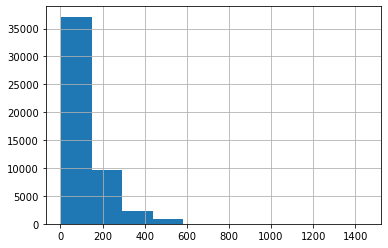

In [28]:
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()

In [29]:
pd.Series(reviews_len).describe()

count    50000.000000
mean       124.238000
std         93.610184
min          4.000000
25%         66.000000
50%         92.000000
75%        151.000000
max       1449.000000
dtype: float64

#### Removendo os reviews muito grandes

In [30]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [31]:
reviews_len = [len(x) for x in reviews_int]
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l<301 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l<301 ]

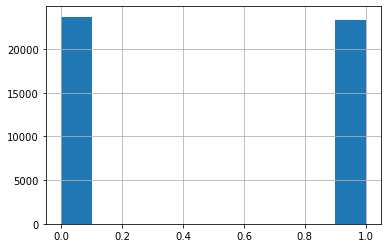

In [32]:
pd.Series(encoded_labels).hist()
plt.show()

In [33]:
pd.Series(encoded_labels).describe()

count    47022.000000
mean         0.496193
std          0.499991
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
dtype: float64

####  Em seguida, adicionado número de valor 0 em todos os exemplos até eles terem o tamanho padrão de 300.

In [34]:
def pad_features(reviews_int, seq_length):
    
    ##Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review        
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [35]:
len(reviews_int)

47022

In [36]:
features = pad_features(reviews_int,300)

In [37]:
len(features)

47022

### Treinamento

#### Como não funcionou como eu esperava a leitura do IMDB() do próprio torchtext, seguindo uma idéia da internet separei manualmente os textos em treinamento, validação e teste na fração de 80/10/10

In [38]:
len_feat = len(features)
split_frac = 0.8

train_x = np.array(features[0:int(split_frac*len_feat)])
train_y = np.array(encoded_labels[0:int(split_frac*len_feat)])

remaining_x = np.array(features[int(split_frac*len_feat):])
remaining_y = np.array(encoded_labels[int(split_frac*len_feat):])

valid_x = np.array(remaining_x[0:int(len(remaining_x)*0.5)])
valid_y = np.array(remaining_y[0:int(len(remaining_y)*0.5)])

test_x = np.array(remaining_x[int(len(remaining_x)*0.5):])
test_y = np.array(remaining_y[int(len(remaining_y)*0.5):])

In [39]:
train_x

array([[    0,     0,     0, ...,  8751,  2164,   109],
       [    0,     0,     0, ...,  5759,   223,   271],
       [    0,     0,     0, ...,    12,    82,   283],
       ...,
       [    0,     0,     0, ...,   476,    44,   450],
       [    0,     0,     0, ...,   416,   732, 41280],
       [    0,     0,     0, ...,    46,    78,    42]])

#### Utilizando o DataLoader apra carregar os dados em batch no tamanho de 50

In [40]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [41]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 50

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [42]:
# obtain one batch of training data
dataiter = iter(valid_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 300])
Sample input: 
 tensor([[    0,     0,     0,  ...,   833,    23,   542],
        [    0,     0,     0,  ...,  8038,  2362, 17197],
        [    0,     0,     0,  ...,  8313,   180,   317],
        ...,
        [    0,     0,     0,  ..., 15543, 14221,   245],
        [    0,     0,     0,  ...,  5719,     6,   723],
        [    0,     0,     0,  ...,    98,   728,   225]], dtype=torch.int32)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], dtype=torch.int32)


In [44]:
import torch.nn as nn
train_on_gpu = False

class AnaliseIMDBLSTM(nn.Module):

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
       
        super().__init__()

        # variaveis
        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # LSTM
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout
        self.dropout = nn.Dropout(0.3)
        
        # sigmoid 
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        
        batch_size = x.size(0)

        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(lstm_out)
        out = self.fc(out)

        sig_out = self.sig(out)
        
        # reshape dos dados
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1]
        
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
       
        # inicia os dados da camada hidden
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [45]:
# Configuração da Rede
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 256
hidden_dim = 128
n_layers = 2
net = AnaliseIMDBLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

AnaliseIMDBLSTM(
  (embedding): Embedding(121079, 256)
  (lstm): LSTM(256, 128, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=1, bias=True)
  (sig): Sigmoid()
)


#### Execução do treinamento

#### Eu tive um problema com o tamanho dos batchs. Como eles não eram exatos, os ultimos sempre ficavam menores e travavam o treinamento. Por isso, tanto no loop de teste, quando no de validação, eu testo o tamanho. Depois, em conversa com colegas, descobri que tem um parâmetro para tratar isso, contudo, acabei deixando assim mesmo, me ensinou várias coisas o erro.

In [40]:
# parametro para usar GPU
train_on_gpu = False

# loss e otimização
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# número de épocas
epochs = 4

# contador para saida
counter = 0
print_every = 100

# seguindo alguns tutorias na internet, adicionado um clip de gradiante para melhorar resultado
clip=5

if(train_on_gpu):
    net.cuda()

net.train()
for e in range(epochs):
    
    # inicializa camada hidden
    h = net.init_hidden(batch_size)

    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # confere se o batch tem o tamanho correto
        if(len(inputs) ==batch_size ):
            
            print('.',end='')
                
            h = tuple([each.data for each in h])

            # zera gradientes
            net.zero_grad()

            # pega resultados
            inputs = inputs.type(torch.LongTensor)
            output, h = net(inputs, h)

            # calcula a loss e faz o backward
            loss = criterion(output.squeeze(), labels.float())
            loss.backward()
            
            # dica de tutorial da internet para resolver bug/problema que pode ocorrer de clip de gradiante
            nn.utils.clip_grad_norm_(net.parameters(), clip)
            optimizer.step()

        # gera resultado intermediário de loss
        if counter % print_every == 0:
            
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # confere tamanho do batch
                if(len(inputs)==batch_size):
                    
                    val_h = tuple([each.data for each in val_h])

                    if(train_on_gpu):
                        inputs, labels = inputs.cuda(), labels.cuda()

                    # calcula loss do dataset de validação
                    inputs = inputs.type(torch.LongTensor)
                    output, val_h = net(inputs, val_h)
                    val_loss = criterion(output.squeeze(), labels.float())

                    val_losses.append(val_loss.item())

            net.train()
            print('')
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

....................................................................................................
Epoch: 1/4... Step: 100... Loss: 0.461339... Val Loss: 0.951206
....................................................................................................
Epoch: 1/4... Step: 200... Loss: 0.438513... Val Loss: 0.527502
....................................................................................................
Epoch: 1/4... Step: 300... Loss: 0.427189... Val Loss: 0.785896
....................................................................................................
Epoch: 1/4... Step: 400... Loss: 0.477046... Val Loss: 0.790260
....................................................................................................
Epoch: 1/4... Step: 500... Loss: 0.380977... Val Loss: 0.503211
....................................................................................................
Epoch: 1/4... Step: 600... Loss: 0.442282... Val Loss: 0.612322
..........

### Teste na massa de teste

In [41]:
# variavel de gpu
train_on_gpu = False

test_losses = [] #
num_correct = 0

h = net.init_hidden(batch_size)

net.eval()

# avaliação dos dados de teste
for inputs, labels in test_loader:

    if(len(inputs) ==batch_size ):
            
        print('.',end='')
        h = tuple([each.data for each in h])

        # pega resultados
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calcula loss
        test_loss = criterion(output.squeeze(), labels.float())
        test_losses.append(test_loss.item())

        pred = torch.round(output.squeeze())

        # compara resultados
        correct_tensor = pred.eq(labels.float().view_as(pred))
        correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
        num_correct += np.sum(correct)

print("Test loss: {:.3f}".format(np.mean(test_losses)))

test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

..............................................................................................Test loss: 0.029
Test accuracy: 0.991


In [42]:
num_correct

4659

### Resultados

#### Os resultados foram bastante bons. Inicialmente, eu havia utilizado uma configuração de rede menor:

##### output_size = 1,  embedding_dim = 128, hidden_dim = 64, n_layers = 2

#### Os resultados haviam sido um pouco pior, então eu aumentei um pouco ela. Também notei melhora removendo os stop words. Também, não sei se deveria usar todo o conjunto de dados e divi-los em treinamento/validação/teste, mas não me pareceu errado. Aparentemente a base do IMDB é dividida 50/50% nos seus dados de treinamento e teste, mas ignorei isso e carreguei tudo. 

#### Como melhoria, seria possível tambem remover as palavras com menores ocorrências, cheguei a começar a fazer isso mas não terminei e não inclui no notebook.


#### Referências: 

In [48]:
# https://colab.research.google.com/github/pytorch/text/blob/master/examples/legacy_tutorial/migration_tutorial.ipynb#scrollTo=iTotRtXe1CWn
# https://towardsdatascience.com/sentiment-analysis-using-lstm-step-by-step-50d074f09948
# https://github.com/biplob004/codeShare/blob/main/lstm-sentiment-analysis.ipynb
# https://towardsdatascience.com/multiclass-text-classification-using-lstm-in-pytorch-eac56baed8df
# https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html